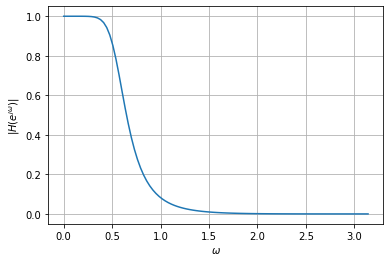

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf

# if using termux
# import subprocess
# import shlex
# end if

# read .wav file
input_signal, fs = sf.read('/home/dhanush/Downloads/filter_codes_filter_codes_Sound_Noise.wav')

# sampling frequency of Input signal
sampl_freq = fs

# order of the filter
order = 4

# cutoff frquency 4kHz
cutoff_freq = 4000.0

# digital frequency
Wn = 2 * cutoff_freq / sampl_freq

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order, Wn, 'low')


# DTFT
def H(z):
    num = np.polyval(b, z ** (-1))
    den = np.polyval(a, z ** (-1))
    H = num / den
    return H


# Input and Output
omega = np.linspace(0, np.pi, 100)

# subplots
plt.plot(omega, abs(H(np.exp(1j * omega))))
plt.xlabel('$\omega$')
plt.ylabel('$|H(e^{\jmath\omega})| $')
plt.grid()  # minor

# if using termux
# plt.savefig('../figs/prob_7-2-2.png')
# plt.savefig('../figs/prob_7-2-2.eps')
# plt.savefig('../figs/prob_7-2-2.pdf')
# subprocess.run(shlex.split("termux-open ../figs/dtft.pdf"))
# else
plt.show()